In [1]:
# Imports
import plotting_master as pm
import run

# Parameters
number_of_companies = 250
number_of_workers = 5 * number_of_companies 
salary_increase = 0.075
interest_rate_free = 1.  # "variable" or float
mutation_magnitude = 0.1 # Float, "spread", "last_T"
prob_exponent = 1
# Bankruptcy: negative_money, cannot_pay_salary
# mutation: "constant", "spread", "last_T", "minimum", "log", "mean"
update_methods = {"worker_update": "limited", 
                  "bankruptcy": "cannot_pay_salary",
                  "mutation": "constant"}
warmup_steps = 0
time_steps = 5000 + warmup_steps 
seed = None

# Multiple m values
m_values = [1e-2, 5e-2, 1e-1, 5e-1, 1, 5, 10]
prob_exponent_values = [0, 1, 2, 4, 6, 8]
group_name_list_mutation = []
group_name_list_prob_expo = []
create_data = run.RunWorkForce(number_of_companies, number_of_workers, salary_increase, 
                            interest_rate_free, mutation_magnitude, prob_exponent, update_methods, time_steps, seed)
gname = create_data._get_group_name()


# Get group name list
# Mutation size
for m in m_values:
    create_data.mutation_magnitude = m
    group_name_list_mutation.append(create_data._get_group_name())
# # Reset m
create_data.mutation_magnitude = mutation_magnitude

# Prob exponent
for exponent in prob_exponent_values:
    create_data.prob_exponent = exponent
    group_name_list_prob_expo.append(create_data._get_group_name())
# Reset exponent
create_data.prob_exponent = prob_exponent

# Create plotting instance
plotter = pm.PlotMaster(gname, skip_values=warmup_steps)

### Store values

In [2]:
create_data.store_data_in_group()

Storing data in Steps5000_N250_W1250_ds0.075_m0.1_wupdatelimited_rf1.0_ProbExpo1


100%|██████████| 4999/4999 [00:03<00:00, 1657.54it/s]


In [ ]:
create_data.repeated_m_runs(N_repeat=10, m_values=m_values)

In [ ]:
# Store data
for m in m_values:
    print("m = ", m)
    create_data.mutation_magnitude = m
    create_data.store_data_in_group()


In [ ]:
# Store Prob exponent data
for expo in prob_exponent_values:
    print("expo = ", expo) 
    create_data.prob_exponent = expo
    create_data.store_data_in_group()

### Plotting

In [ ]:
plotter.plot_collective()

In [ ]:
plotter.plot_salary()

In [ ]:
plotter.plot_debt()

In [ ]:
print(plotter.went_bankrupt[-100:])

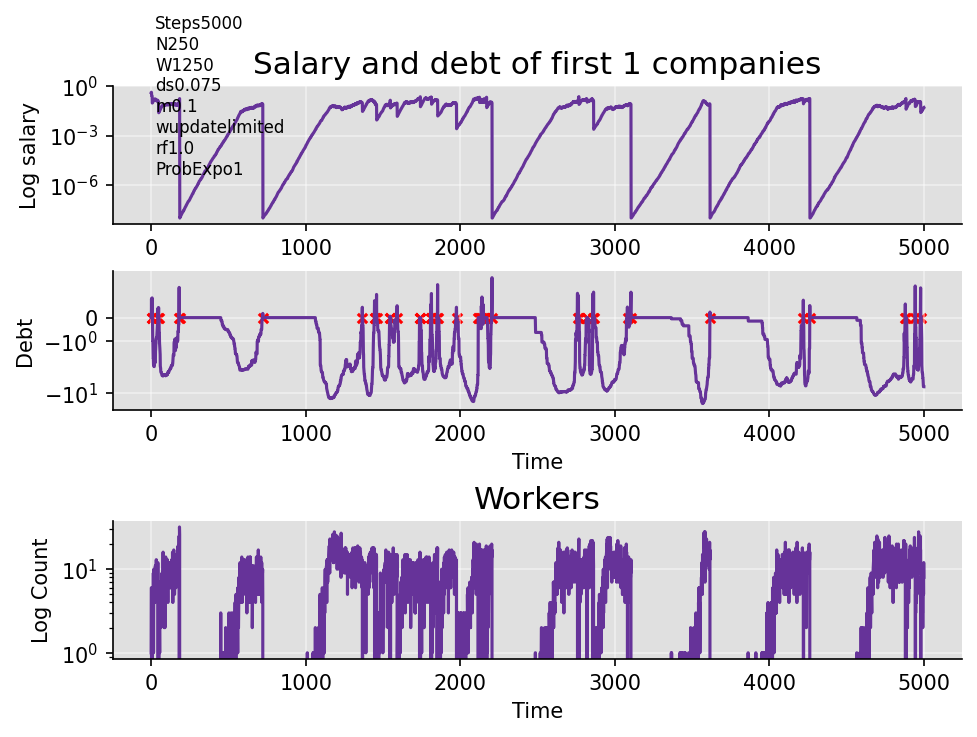

51


In [3]:
plotter.plot_single_companies(N_plot=1)
print(plotter.first_company_went_bankrupt.sum())

In [ ]:
plotter.plot_mutations()

In [ ]:
plotter.plot_salary_and_debt_distributions()

In [ ]:
plotter.plot_multiple_mutation_size(group_name_list_mutation)

In [ ]:
plotter.plot_multiple_prob_expo(group_name_list_prob_expo)

In [ ]:
plotter.plot_repeated_mutation_size()